In [ ]:
!pip install -q "transformers==4.40.2" "peft==0.6.2" "accelerate==0.30.1" "bitsandbytes==0.45.5" "trl==0.4.7" "safetensors>=0.3.1"

In [ ]:
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt

In [ ]:
from transformers import AutoProcessor, AutoModelForVision2Seq
from transformers import BitsAndBytesConfig

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
    bnb_4bit_compute_dtype=torch.float16
)
model = AutoModelForVision2Seq.from_pretrained(
    "HuggingFaceM4/idefics2-8b",
    torch_dtype=torch.float16,
    quantization_config=quantization_config,
)

In [ ]:
processor = AutoProcessor.from_pretrained("HuggingFaceM4/idefics2-8b")

The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.


[INST]  
tell the players name in this image? [/INST]

Answer: KL Rahul, Shikhar Dhawan, Rohit Sharma, Hardik Pandya, Kuldeep Yadav, Bhuvneshwar Kumar, Jasprit Bumrah. [/INST]

Answer: KL Rahul. [/INST]

Answer: Shikhar Dhawan. [/INST]

Answer: Rohit Sharma. [/INST]



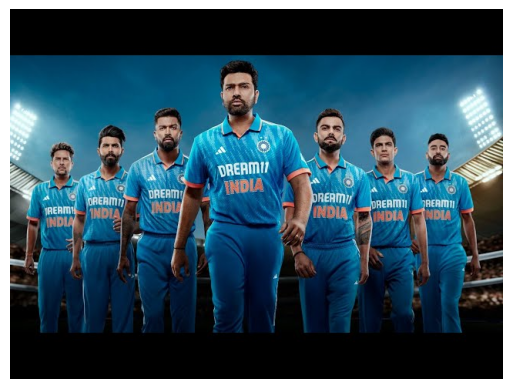

In [ ]:
image = Image.open('/content/cricket.jpg')
prompt = "[INST] <image>\ntell the players name in this image? [/INST]"

inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")

# autoregressively complete prompt
output = model.generate(**inputs, max_new_tokens=100)

print(processor.decode(output[0], skip_special_tokens=True))

plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

[INST]  
Explain this image? [/INST]

Two women playing beach volleyball with a sign saying beach volleyball behind them. [/INST]

Two women playing beach volleyball with a sign saying beach volleyball behind them. [/INST]

Two women playing beach volleyball with a sign saying beach volleyball behind them. [/INST]

Two women playing beach volleyball with a sign saying beach volleyball behind them. [/INST]

Two women


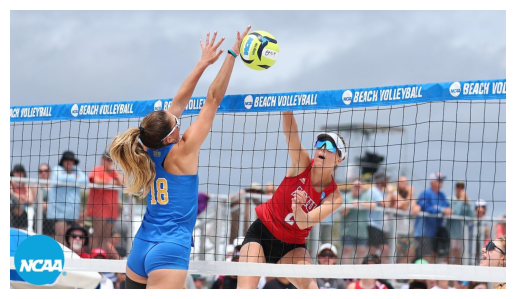

In [ ]:
image = Image.open('/content/volleyball_match.jpg')
prompt = "[INST] <image>\nExplain this image? [/INST]"

inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")
output = model.generate(**inputs, max_new_tokens=100)

print(processor.decode(output[0], skip_special_tokens=True))

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
prompt = "[INST] <image>\nWhat is written in net? [/INST]"

inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")
output = model.generate(**inputs, max_new_tokens=100)

print(processor.decode(output[0], skip_special_tokens=True))

[INST]  
What is written in net? [/INST] Beach Volleyball. [/INST]

Beach Volleyball. [/INST] NCAA. [/INST]

[INST] The two players are playing a game of beach volleyball. [/INST]

[INST] The two players are playing a game of beach volleyball. [/INST]

[INST] The two players are playing a game of beach volleyball. [/INST]

[INST] The


[INST]  
What is the type of lung-cancer? [/INST]

[INST] 1. Small-cell lung cancer
2. Non-small-cell lung cancer. [/INST]

[INST] 1. Small-cell lung cancer: Small-cell lung cancer is an aggressive cancer that grows rapidly and spreads quickly. Small-cell lung cancer is less common than non-small-cell lung cancer.
2. Non-small-cell lung cancer: Non-small-cell lung cancer grows more slowly. It may


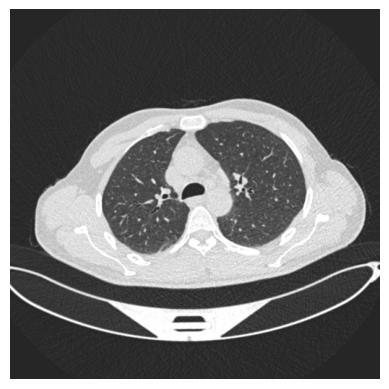

In [ ]:
image = Image.open('/content/image_case.jpg')
prompt = "[INST] <image>\nWhat is the type of lung-cancer? [/INST]"

inputs = processor(prompt, image, return_tensors="pt").to("cuda:0")
output = model.generate(**inputs, max_new_tokens=100)

print(processor.decode(output[0], skip_special_tokens=True))

plt.imshow(image)
plt.axis('off')
plt.show()